In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd


In [2]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("../Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


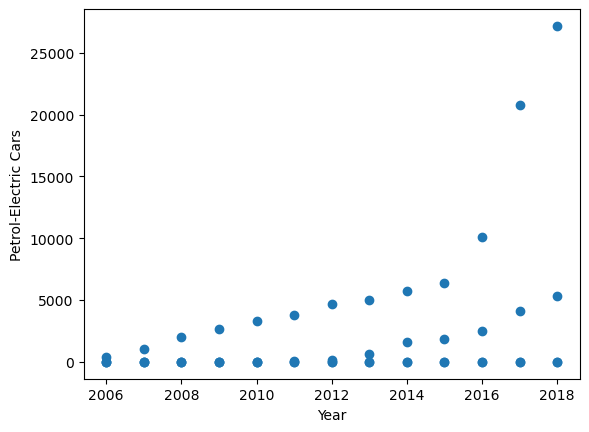

In [15]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = vehicle_data.loc[vehicle_data['engine'] == 'Petrol-Electric', 'year']
y_values = vehicle_data.loc[vehicle_data['engine'] == 'Petrol-Electric', 'number']
plt.scatter(x_values, y_values)
plt.xlabel('Year')
plt.ylabel('Petrol-Electric Cars')
plt.show()



In [16]:
# Perform a linear regression on year versus petrol-electric cars
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Print out the stats
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: 523.4560439560438
Intercept: -1051090.8681318678
R-squared: 0.15862970074596422
P-value: 0.00345240092695921
Standard Error: 170.4890742584186


In [18]:
# Create equation of line to calculate predicted number of petrol-electric cars
def predict_petrol_electric(year):
    return slope * year + intercept

# Test the function with a year
predict_year = 2020
predicted_cars = predict_petrol_electric(predict_year)
print(f"Predicted number of petrol-electric cars in {predict_year}: {predicted_cars}")


Predicted number of petrol-electric cars in 2020: 6290.340659340611


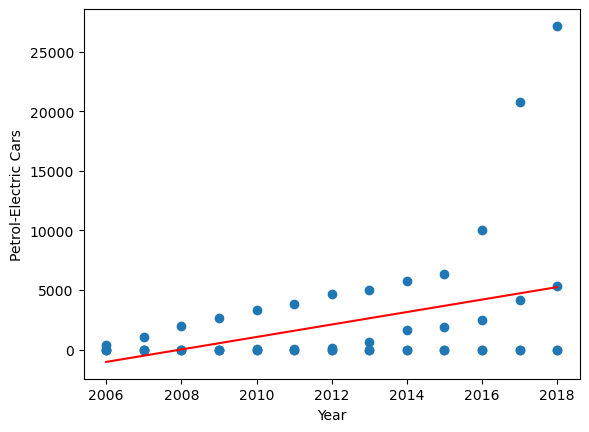

In [20]:
# Plot the linear model on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, predict_petrol_electric(x_values), color="red")
plt.xlabel('Year')
plt.ylabel('Petrol-Electric Cars')
plt.show()


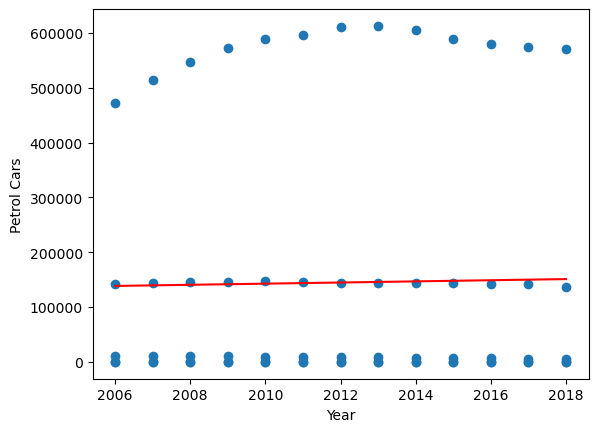

In [22]:
# Filtering the data for petrol cars
x_values_petrol = vehicle_data.loc[vehicle_data['engine'] == 'Petrol', 'year']
y_values_petrol = vehicle_data.loc[vehicle_data['engine'] == 'Petrol', 'number']

# Perform linear regression
slope_petrol, intercept_petrol, _, _, _ = stats.linregress(x_values_petrol, y_values_petrol)

# Define the prediction function
def predict_petrol(year):
    return slope_petrol * year + intercept_petrol

# Plotting the scatter plot and the linear model
plt.scatter(x_values_petrol, y_values_petrol)
plt.plot(x_values_petrol, predict_petrol(x_values_petrol), color="red")
plt.xlabel('Year')
plt.ylabel('Petrol Cars')
plt.show()


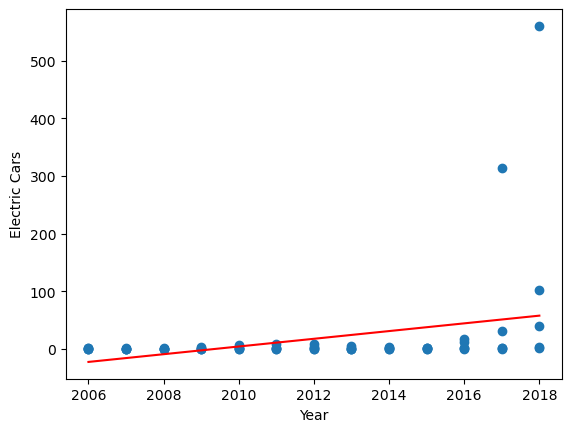

In [23]:
# Filtering the data for electric cars
x_values_electric = vehicle_data.loc[vehicle_data['engine'] == 'Electric', 'year']
y_values_electric = vehicle_data.loc[vehicle_data['engine'] == 'Electric', 'number']

# Perform linear regression
slope_electric, intercept_electric, _, _, _ = stats.linregress(x_values_electric, y_values_electric)

# Define the prediction function
def predict_electric(year):
    return slope_electric * year + intercept_electric

# Plotting the scatter plot and the linear model
plt.scatter(x_values_electric, y_values_electric)
plt.plot(x_values_electric, predict_electric(x_values_electric), color="red")
plt.xlabel('Year')
plt.ylabel('Electric Cars')
plt.show()


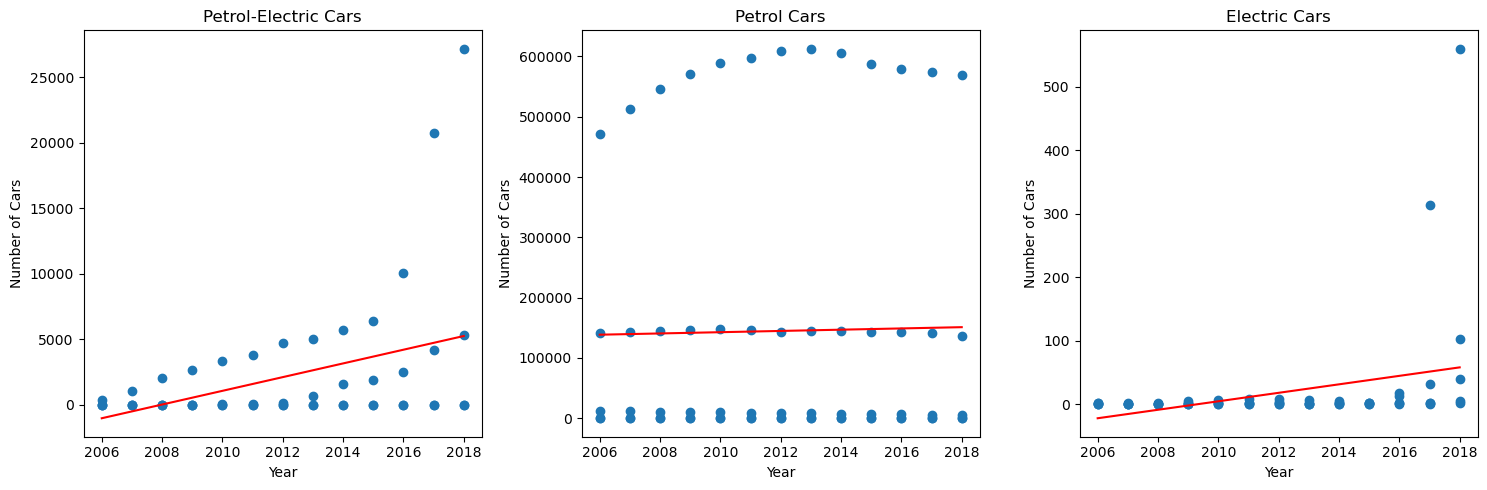

In [24]:
# Create subplots: one row, three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting petrol-electric cars
axs[0].scatter(x_values, y_values)
axs[0].plot(x_values, predict_petrol_electric(x_values), color="red")
axs[0].set_title('Petrol-Electric Cars')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Cars')

# Plotting petrol cars
axs[1].scatter(x_values_petrol, y_values_petrol)
axs[1].plot(x_values_petrol, predict_petrol(x_values_petrol), color="red")
axs[1].set_title('Petrol Cars')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Cars')

# Plotting electric cars
axs[2].scatter(x_values_electric, y_values_electric)
axs[2].plot(x_values_electric, predict_electric(x_values_electric), color="red")
axs[2].set_title('Electric Cars')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Number of Cars')

plt.tight_layout()
plt.show()


In [21]:
# Calculate the number of cars for 2024
predicted_cars_2024 = predict_petrol_electric(2024)
print(f"Predicted number of petrol-electric cars in 2024: {predicted_cars_2024}")


Predicted number of petrol-electric cars in 2024: 8384.16483516479
